# Proyek Analisis Data : E-Commerce Public Dataset

- **Nama** : Zulfikar Irham
- **Email** : zulfikarirham02@gmail.com
- **ID Dicoding** : zulfikar_irham02

# Menentukan Pertanyaan Bisnis

## Pertanyaan 1 : Kategori produk apa yang paling banyak diorder.
## Pertanyaan 2 : Berapa total pemesanan produk dan bagaimana perubahannya dari waktu ke waktu?
## Pertanyaan 3 : Berapa total pendapatan perusahaan dan bagaimana perubahannya dari waktu ke waktu?
## Pertanyaan 4 : Apa metode pembayaran yang paling sering digunakan oleh customer?
## Pertanyaan 5 : Kapan pelanggan ini melakukan transaksi?
## Pertanyaan 6 : Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
## Pertanyaan 7 : Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

# Import Semua Library/Package yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Wrangling

Data wrangling merupakan sebuah proses untuk pengumpulan data (Data Gathering), penilaian data (Assessing Data), dan pembersihan data (Data Cleaning)

## Data Gathering

Pada tahap ini akan dilakukan proses pengumpulan semua data E-Commerce Public Dataset yang dibutuhkan

### Memuat Tabel Customer

In [2]:
customers_df = pd.read_csv("Data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Memuat Tabel Order Items

In [4]:
order_items_df = pd.read_csv("Data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Memuat Tabel Order Payment

In [5]:
order_payments_df = pd.read_csv("Data/order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Memuat Tabel Order Reviews

In [6]:
order_reviews_df = pd.read_csv("Data/order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Memuat Tabel Order Dataset

In [7]:
orders_df = pd.read_csv("Data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Memuat Tabel Product Category Name Translation

In [8]:
product_category_df = pd.read_csv("Data/product_category_name_translation.csv")
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Memuat Tabel Products Dataset

In [9]:
products_df = pd.read_csv("Data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Memuat Tabel Seller

In [10]:
sellers_df = pd.read_csv("Data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Assessing Data

Assessing data merupakan proses untuk menilai kualitas pada data. Proses ini juga sekaligus mengidentifikasi missing values, duplikasi data, dll.

### Menilai Tabel Customer

Tahap pertama memeriksa semua tipe data pada tabel customer dengan `info()`

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Jika diperhatikan tabel customer tidak ada masalah terkait tipe data.

Selanjutnya mari mengecek apakah ada missing values pada tabel customer.

In [12]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Tidak ada missing values pada tabel customer.

Selanjutnya mengecek apakah ada duplikasi data pada tabel customer.

In [13]:
print(f"Jumlah duplikasi data : {customers_df.duplicated().sum()}")

Jumlah duplikasi data : 0


Tabel customer tidak memiliki duplikasi data.

Mari kita periksa deskripsi statistiknya dengan `describe()`

In [14]:
customers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_zip_code_prefix,99441.0,35137.474583,29797.938996,1003.0,11347.0,24416.0,58900.0,99990.0


### Menilai Data Order Items

Menggunakan `info()` untuk mengecek tipe data setiap variabel pada data order items

In [19]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Ubah shipping_limit_date ke datetime.

Selanjutnya mengecek missing values.

In [20]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Tidak ada missing values.

Selanjutnya mengecek jumlah duplikasi datanya.

In [21]:
print(f"Jumlah duplikasi data : {order_items_df.duplicated().sum()}")

Jumlah duplikasi data : 0


In [22]:
order_items_df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_item_id,112650.0,1.197834,0.705124,1.00,1.00,1.00,1.00,21.00
price,112650.0,120.653739,183.633928,0.85,39.90,74.99,134.90,6735.00
freight_value,112650.0,19.990320,15.806405,0.00,13.08,16.26,21.15,409.68


Rata-rata harga yang diorder adalah **120.654** dan 25% teratas produk memilik harga lebih tinggi dari **134.90**. Sedangkan, 25% produk yang memiliki harga terendah kurang dari **39.90**.

### Menilai Data Order Payment

Menggunakan `info()` untuk mengecek tipe data setiap variabel pada data order payment

In [23]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Tipe data pada setiap variabel tidak ada yang aneh.

Selanjutnya mari dicek missing values

In [24]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Data order payment tidak memiliki missing values

In [25]:
print(f"Jumlah duplikasi data : {order_payments_df.duplicated().sum()}")

Jumlah duplikasi data : 0


Data order payment tidak memiliki duplicate data

In [26]:
order_payments_df.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_sequential,103886.0,1.092679,0.706584,1.0,1.00,1.0,1.0000,29.00
payment_installments,103886.0,2.853349,2.687051,0.0,1.00,1.0,4.0000,24.00
payment_value,103886.0,154.100380,217.494064,0.0,56.79,100.0,171.8375,13664.08


Jumlah maksimum payment installments yang digunakan customer adalah **24**. sekitar 75% customer jumlah metode pembayarannya adalah 1.

### Menilai Data Order Review

In [27]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Review_creation_date dan review_answer_timestamp seharusnya bertipe data datetime

In [28]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Review_comment_title dan review_comment_message memiliki missing values.

In [29]:
print(f"Jumlah duplikasi data : {order_reviews_df.duplicated().sum()}")

Jumlah duplikasi data : 0


Data order review tidak memiliki yang duplikat.

In [30]:
order_reviews_df.describe().T

,count,mean,std,min,25%,50%,75%,max
review_score,99224.0,4.086421,1.347579,1.0,4.0,5.0,5.0,5.0


Rata-rata score yang diberikan customer adalah 4.

### Menilai Data Order 

In [31]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Untuk variabel order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_data seharusnya bertipe data datetime.

In [32]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Data orders pada variabel order_approved_at, order_delivered_carrier_date, dan order_estimated_delivery_date ada missing values.

In [33]:
print(f"Jumlah duplikasi data : {orders_df.duplicated().sum()}")

Jumlah duplikasi data : 0


Data orders tidak memilik yang duplikat

In [34]:
orders_df.describe().T

,count,unique,top,freq
order_id,99441,99441,e481f51cbdc54678b7cc49136f2d6af7,1
customer_id,99441,99441,9ef432eb6251297304e76186b10a928d,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-04-11 10:48:14,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2018-05-08 23:38:46,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


### Menilai Data Product Category Name Translation

In [35]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Tipe data pada product category sudah sesuai.

Selanjutnya mencari missing values.

In [36]:
product_category_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

Tidak ada missing values.

Selanjutnya mencari data yang duplikat.

In [37]:
print(f"Jumlah duplikasi data : {product_category_df.duplicated().sum()}")

Jumlah duplikasi data : 0


Tidak ada data yang duplikat.

### Menilai Data Product

Menggunakan `info()` untuk mencari tipe data yang sesuai pada setiap variabel.

In [38]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Tipe datanya sudah sesuai.

Selanjutnya mencari missing values.

In [39]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Ternyata variabel product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty memiliki missing values.

Selanjutnya mencari data yang duplikat.

In [40]:
print(f"Jumlah duplikasi data : {products_df.duplicated().sum()}")

Jumlah duplikasi data : 0


Data product tidak ada yang duplikat.

Melihat descriptive statistic untuk semua variabel numerik.

In [41]:
products_df.describe().T

,count,mean,std,min,25%,50%,75%,max
product_name_lenght,32341.0,48.476949,10.245741,5.0,42.0,51.0,57.0,76.0
product_description_lenght,32341.0,771.495285,635.115225,4.0,339.0,595.0,972.0,3992.0
product_photos_qty,32341.0,2.188986,1.736766,1.0,1.0,1.0,3.0,20.0
product_weight_g,32949.0,2276.472488,4282.038731,0.0,300.0,700.0,1900.0,40425.0
product_length_cm,32949.0,30.815078,16.914458,7.0,18.0,25.0,38.0,105.0
product_height_cm,32949.0,16.937661,13.637554,2.0,8.0,13.0,21.0,105.0
product_width_cm,32949.0,23.196728,12.079047,6.0,15.0,20.0,30.0,118.0


Ada keanehan pada product_weight_g yang beratnya 0 g.

### Menilai Data Seller

Menggunakan `info()` untuk melihat tipe data pada Data seller.

In [42]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Tipe datanya sudah sesuai.

Selanjutnya mencari missing values.

In [43]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Tidak terdapat missing values.

Selanjutnya, kita mencari jumlah data yang duplikat.

In [44]:
print(f"Jumlah duplikasi data : {sellers_df.duplicated().sum()}")

Jumlah duplikasi data : 0


Tidak terdapat data yang duplikat.

In [45]:
sellers_df.describe().T

,count,mean,std,min,25%,50%,75%,max
seller_zip_code_prefix,3095.0,32291.059451,32713.45383,1001.0,7093.5,14940.0,64552.5,99730.0


## Cleaning Data

Data customer, order items, dan order payment sudah bersih datanya.

### Membersihkan Data Order Items

Mengganti  shipping_limit_date ke datetime

In [48]:
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])

In [49]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


## Membersihkan Data Order Reviews

Menangani missing values.

Variabel yang ada missing valuesnya adalah review_comment_title dan
review_comment_message   

Cek data order reviews yang ada missing valuesnya.

In [50]:
order_reviews_df[order_reviews_df["review_comment_title"].isna() & order_reviews_df["review_comment_message"]]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22
16,9314d6f9799f5bfba510cc7bcd468c01,0dacf04c5ad59fd5a0cc1faa07c34e39,2,NaN,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",2018-01-18 00:00:00,2018-01-20 21:25:45
24,0e0190b9db53b689b285d3f3916f8441,79832b7cb59ac6f887088ffd686e1d5e,5,NaN,obrigado pela atençao amim dispensada,2017-12-01 00:00:00,2017-12-09 22:58:58
...,...,...,...,...,...,...,...
99205,98fffa80dc9acbde7388bef1600f3b15,d398e9c82363c12527f71801bf0e6100,4,NaN,para este produto recebi de acordo com a compr...,2017-11-29 00:00:00,2017-11-30 15:52:51
99208,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,NaN,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23
99215,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,NaN,"O produto não foi enviado com NF, não existe v...",2018-05-19 00:00:00,2018-05-20 21:51:06
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43


Karena hanya deskripsi review saja maka data dengan missing values bisa diisi dengan  `Not Exist` artinya customer tersebut tidak mengisi deskripsi.

In [51]:
order_reviews_df.fillna("Not Exist", axis=0, inplace=True)

In [52]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Mengubah tipe data review_creation_date dan review_answer_timestamp ke datetime

In [53]:
datetime_columns = ["review_creation_date","review_answer_timestamp"]

for column in datetime_columns:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [54]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


## Membersihkan Data Order

Untuk variabel order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_data ubah tipe datannya menjadi datetime.

In [55]:
datetime_columns = ["order_purchase_timestamp","order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [56]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Mengecek missing values

In [57]:
orders_df[orders_df["order_approved_at"].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [58]:
orders_df[orders_df["order_status"] == "canceled"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
1058,3a129877493c8189c59c60eb71d97c29,0913cdce793684e52bbfac69d87e91fd,canceled,2018-01-25 13:34:24,2018-01-25 13:50:20,2018-01-26 21:42:18,NaT,2018-02-23
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
...,...,...,...,...,...,...,...,...
98791,b159d0ce7cd881052da94fa165617b05,e0c3bc5ce0836b975d6b2a8ce7bb0e3e,canceled,2017-03-11 19:51:36,2017-03-11 19:51:36,NaT,NaT,2017-03-30
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99143,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01 22:26:25,2017-10-01 22:35:22,NaT,NaT,2017-10-27
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


karena missing value dalam table orders kebanyakan merupakan tipe data datetime yang menyangkut tentang waktu pengiriman paket, maka paket yang belum sampai kepada kurir atau pelanggan akan menjadi missing value. missing value ini juga berpengaruh pada order_status, maka missing value dengan tipe datetime tidak akan dihapus.

## Membersihkan Data Product

memperbaiki kesalahan tulisan pada kolom **product_name_lenght** dan **product_description_lenght** menjadi **product_name_length** dan **product_description_length** pada products_df

In [59]:
products_df.rename(columns={'product_name_lenght': 'product_name_length', 'product_description_lenght': 'product_description_length'}, inplace=True)

Mengisi missing values dengan mean kecuali pada product_category_name

In [60]:
products_df['product_name_length'].fillna(products_df['product_name_length'].mean(), inplace=True)
products_df['product_description_length'].fillna(products_df['product_description_length'].mean(), inplace=True)
products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].mean(), inplace=True)
products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean(), inplace=True)
products_df['product_length_cm'].fillna(products_df['product_length_cm'].mean(), inplace=True)
products_df['product_height_cm'].fillna(products_df['product_height_cm'].mean(), inplace=True)
products_df['product_width_cm'].fillna(products_df['product_width_cm'].mean(), inplace=True)

In [61]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_length             0
product_description_length      0
product_photos_qty              0
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

mengisi missing value pada kolom product_category_name dalam products_df dengan `not defined`

In [62]:
products_df['product_category_name'].fillna("not defined",inplace=True)

In [63]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Extract Clean Data to CSV

In [94]:
customers_df.to_csv("customers_clean.csv", index=False)
order_items_df.to_csv("order_items_clean.csv", index=False)
order_payments_df.to_csv("order_payments_clean.csv", index=False)
order_reviews_df.to_csv("order_reviews_clean.csv", index=False)
orders_df.to_csv("orders_clean.csv", index=False)
product_category_df.to_csv("product_category_clean.csv", index=False)
products_df.to_csv("products_clean.csv", index=False)
sellers_df.to_csv("sellers_clean.csv", index=False)

# Exploratory Data Analysis (EDA)

## Eksplor Data Customer

Melihat persebaran jumlah customer setiap kota dan state

In [65]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).reset_index().head()

,customer_city,customer_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521


Sao Paulo menjadi kota dengan customer terbanyak yaitu 15540 customer.

In [66]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).reset_index().head()

,customer_state,customer_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045


SP menjadi state dengan cutomer terbanyak yaitu 41746.

## Eksplor Data Order Payment

Mengeksplor jumlah payment_type setiap customer

In [67]:
order_payments_df.groupby(by="payment_type").agg({
    "order_id":"nunique",
    "payment_value":["max","min","mean"]
}).sort_values(by=("order_id","nunique"), ascending=False)

order_id payment_value                   
              nunique           max    min        mean
payment_type                                          
credit_card     76505      13664.08   0.01  163.319021
boleto          19784       7274.88  11.62  145.034435
voucher          3866       3184.34   0.00   65.703354
debit_card       1528       4445.50  13.38  142.570170
not_defined         3          0.00   0.00    0.000000

Credit_card menjadi payment_type favorit para customer.

## Eksplor Data Order Review

Mencari jumlah review skor terbanyak.

In [68]:
order_reviews_df.groupby(by="review_score").review_id.nunique().sort_values(ascending=False)

review_score
5    56910
4    19007
1    11282
3     8097
2     3114
Name: review_id, dtype: int64

Review score terbanyak adalah yang memberi score 5.

## Eksplor Data Order

Melihat jumlah order status

In [69]:
orders_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

Order status yang paling banyak adalah delivered dengan jumlah 96478. Sayang sekali ada order yang dicancel dengan jumlah 625.

## Mengeksplor Data Seller

Menghitung jumlah seller setiap kota dan state

In [70]:
sellers_df.groupby(by=["seller_city"]).seller_id.nunique().sort_values(ascending=False).head()

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
Name: seller_id, dtype: int64

In [71]:
sellers_df.groupby(by=["seller_state"]).seller_id.nunique().sort_values(ascending=False).head()

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
Name: seller_id, dtype: int64

Kota sao paulo dan state SP memiliki jumlah seller terbanyak, yaitu 694 dan 1849.

## Mengeksplor Semua Data Sekaligus Menggabungkan

Gabungin semua data kecual Data Geolocation dan Seller.

In [72]:
all_df = orders_df.merge(order_items_df, on='order_id', how='left')
all_df = all_df.merge(products_df, on='product_id', how='inner')
all_df = all_df.merge(order_payments_df, on='order_id', how = 'left')
all_df = all_df.merge(order_reviews_df, on='order_id', how='left')
all_df = all_df.merge(customers_df, on='customer_id', how='inner')
all_df = all_df.merge(product_category_df, on='product_category_name', how='inner')

In [73]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116576 entries, 0 to 116575
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       116576 non-null  object        
 1   customer_id                    116576 non-null  object        
 2   order_status                   116576 non-null  object        
 3   order_purchase_timestamp       116576 non-null  datetime64[ns]
 4   order_approved_at              116562 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115363 non-null  datetime64[ns]
 6   order_delivered_customer_date  114061 non-null  datetime64[ns]
 7   order_estimated_delivery_date  116576 non-null  datetime64[ns]
 8   order_item_id                  116576 non-null  float64       
 9   product_id                     116576 non-null  object        
 10  seller_id                      116576 non-null  object        
 11  

Cek Missing Values.

In [74]:
all_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1213
order_delivered_customer_date    2515
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_name_length                 0
product_description_length          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_id   

In [75]:
all_df.dropna(inplace=True)

In [76]:
print(f"Jumlah Duplikat Data : {all_df.duplicated().sum()}")

Jumlah Duplikat Data : 0


Nama product dengan jumlah terbanyak dan min,max, dan mean harganya.

In [77]:
all_df.groupby(by="product_category_name_english").agg({
    "product_id": "count", #jumlah pembelian
    "price": ["max", "min", "mean"]
}).sort_values(by=("product_id", "count"), ascending=False).head()

product_id    price                  
                                   count      max   min        mean
product_category_name_english                                      
bed_bath_table                     11684  1999.98  6.99   92.595886
health_beauty                       9749  3124.00  1.20  129.969482
sports_leisure                      8734  4059.00  4.50  113.299196
furniture_decor                     8554  1899.00  4.90   87.254681
computers_accessories               7926  3699.99  3.90  116.386928

Produk bed_bath_table memiliki jumlah terbanyak yang terjual dengan 11684 buah.

Mengeksplor jumlah order setiap tahun.

In [78]:
all_df['year'] = all_df['order_purchase_timestamp'].dt.strftime("%Y")

all_df.groupby(by="year").order_id.nunique().sort_values(ascending=False)

year
2018    51873
2017    42333
2016      266
Name: order_id, dtype: int64

Tahun 2018 menempati jumlah order terbanyak dengan 51873.

Mengeksplor revenue setiap kota.

In [79]:
revenue_bycity_df = all_df.groupby('customer_city').agg({
    'payment_value':['sum','min','max','mean']
})
revenue_bycity_df.rename(columns={
    'payment_value':'revenue'
}).sort_values(by=("revenue","sum"), ascending=False)

revenue                             
                                     sum    min       max        mean
customer_city                                                        
sao paulo                     2726908.04   0.01   4513.32  152.588442
rio de janeiro                1493088.76   0.00  13664.08  191.790464
belo horizonte                 481845.97   0.01   3351.35  153.454131
brasilia                       416839.84   0.67   3736.22  174.995735
curitiba                       320922.09   0.20   3126.50  181.619745
...                                  ...    ...       ...         ...
santo antonio do rio abaixo        24.23  24.23     24.23   24.230000
tamboara                           24.09  24.09     24.09   24.090000
jenipapo de minas                  22.58  22.58     22.58   22.580000
polo petroquimico de triunfo       20.70  20.70     20.70   20.700000
sabaudia                           20.42  20.42     20.42   20.420000

[4071 rows x 4 columns]

Sao Paulo, Rio De Janeiro, Belo Horizonte, Brasilia, dan Curitiba menempati posisi 5 terbanyak dengan jumlah revenue tertinggi.

In [80]:
all_df.groupby(by=['customer_state','product_category_name_english']).agg({
    'payment_value':'sum'
}).sort_values(by=("customer_state"),ascending=False)

payment_value
customer_state product_category_name_english               
TO             watches_gifts                        6719.31
               construction_tools_lights            1190.59
               furniture_living_room                 391.84
               furniture_decor                      4783.65
               fixed_telephony                      1444.57
...                                                     ...
AC             stationery                            646.76
               telephony                            1271.43
               toys                                  318.05
               watches_gifts                        1573.72
               auto                                  661.91

[1346 rows x 1 columns]

In [81]:
top_category_bystate_df = all_df.groupby(by=['customer_state','product_category_name_english']).agg({
    'payment_value':'sum'
})
top_category_bystate_df.rename(columns={
    'payment_value':'revenue'
}, inplace=True)

idx = top_category_bystate_df.groupby('customer_state')['revenue'].idxmax()

top_category_bystate_df.loc[idx].sort_values(by='revenue', ascending=False)

,,revenue
customer_state,product_category_name_english,
SP,bed_bath_table,769871.90
RJ,bed_bath_table,239358.38
MG,bed_bath_table,217771.65
PR,furniture_decor,117407.75
RS,computers_accessories,111269.68
BA,health_beauty,65238.01
SC,computers_accessories,63201.75
PE,health_beauty,55365.66
CE,health_beauty,45334.34


Pada state SP, RJ, dan MJ bath_bed_table menempati posisi 3 teratas untuk payment value.

# Visualization & Explanatory Analysis

## Pertanyaan 1 : Kategori produk apa yang paling banyak diorder.

In [82]:
def set_custom_palette(series, max_color = 'turquoise', other_color = 'lightgrey'):
    max_val = series.max()
    pal = []
    
    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

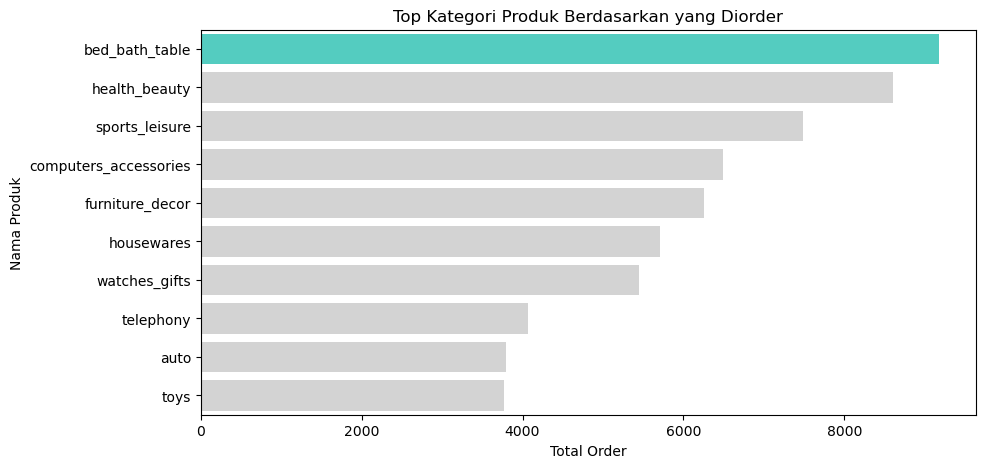

In [83]:
top_category_product = all_df.groupby(by="product_category_name_english").order_id.nunique().sort_values(ascending=False).reset_index()[:10]
palette=set_custom_palette(top_category_product['order_id'])
fig,ax = plt.subplots(figsize=(10,5))
sns.barplot(data=top_category_product, x="order_id", y="product_category_name_english",palette=palette,ax=ax)
ax.set_title("Top Kategori Produk Berdasarkan yang Diorder")
ax.set_xlabel("Total Order")
ax.set_ylabel("Nama Produk")
plt.show()

## Pertanyaan 2 : Berapa total pemesanan produk dan bagaimana perubahannya dari waktu ke waktu?

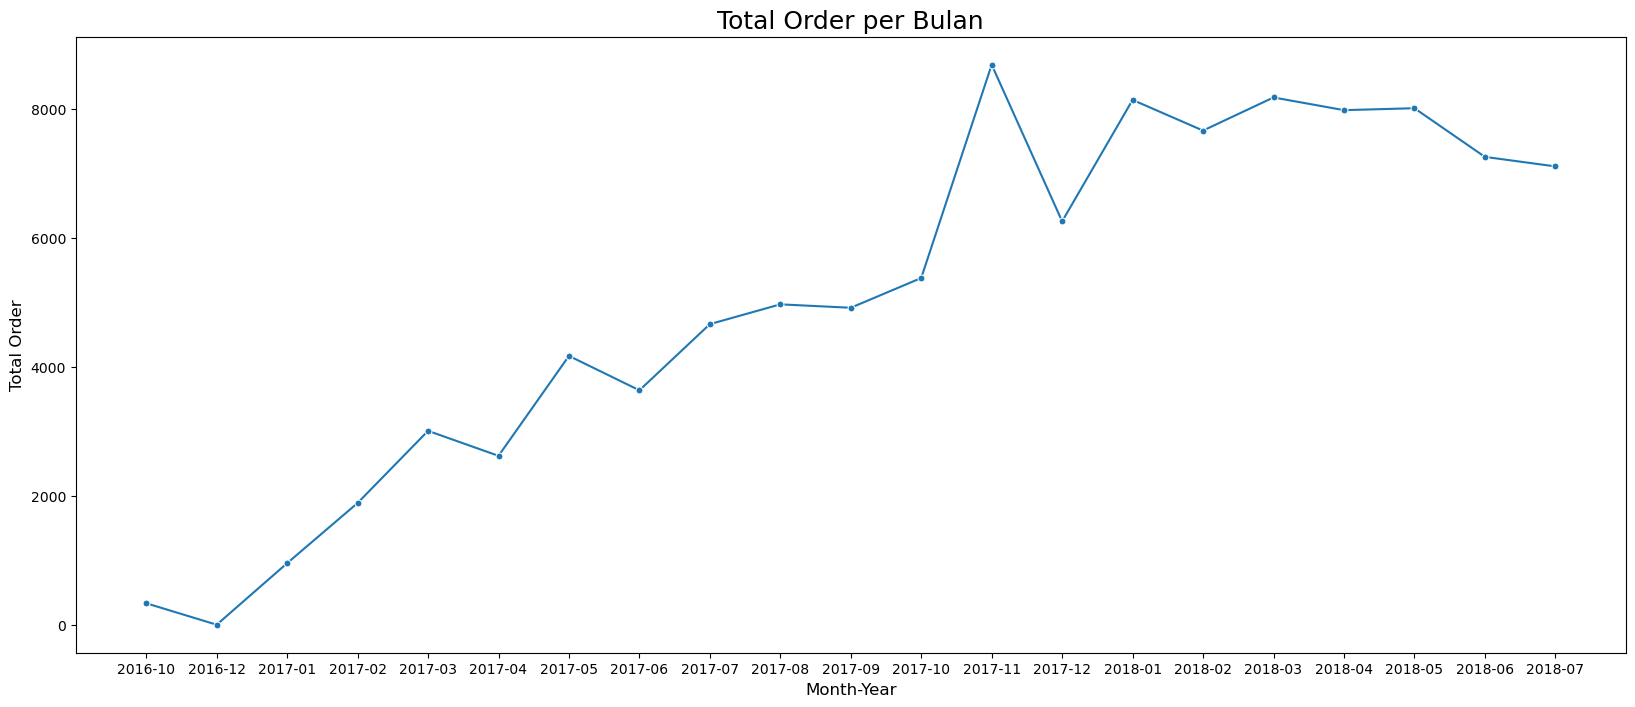

In [84]:
all_df['month_year'] = all_df['order_purchase_timestamp'].dt.strftime('%Y-%m')

order_per_month = all_df.groupby(by="month_year").count()[["order_id"]]
order_per_month = order_per_month.iloc[:-1]
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.lineplot(data=order_per_month, marker='o', markersize=5, color='green')
ax.set_title('Total Order per Bulan', fontsize=18)
ax.set_xlabel('Month-Year', fontsize=12)
ax.set_ylabel('Total Order', fontsize=12)
ax.get_legend().remove()
fig.show()

## Pertanyaan 3 : Berapa total pendapatan perusahaan dan bagaimana perubahannya dari waktu ke waktu?

In [87]:
monthly_orders_df = all_df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

,order_purchase_timestamp,order_count,payment_value
0,2016-10,265,61593.19
1,2016-11,0,0.00
2,2016-12,1,19.62
3,2017-01,729,174843.76
4,2017-02,1582,314200.34


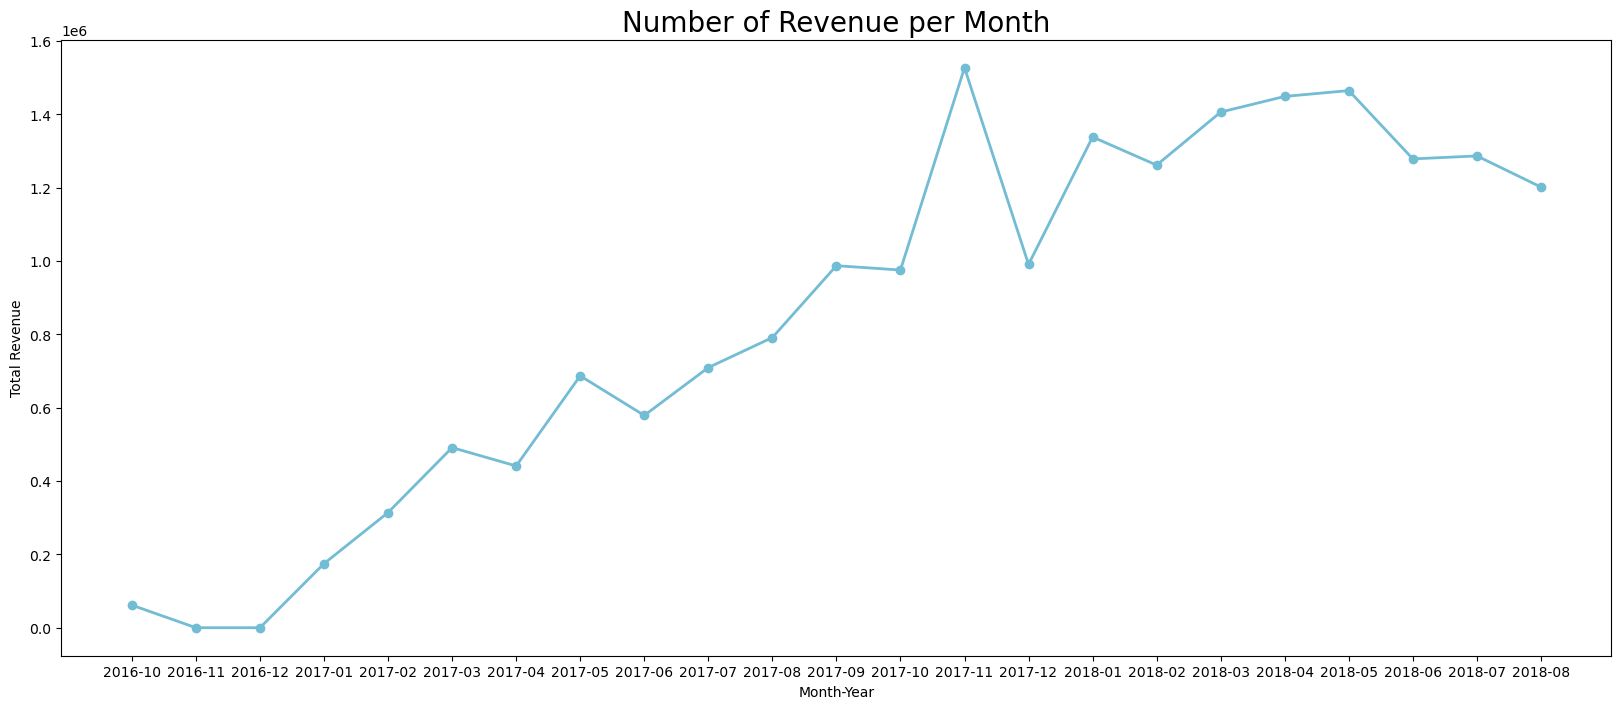

In [88]:
plt.figure(figsize=(20, 8)) 
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["payment_value"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Revenue per Month", loc="center", fontsize=20) 
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue")
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

## Pertanyaan 4 : Apa metode pembayaran yang paling sering digunakan oleh customer?

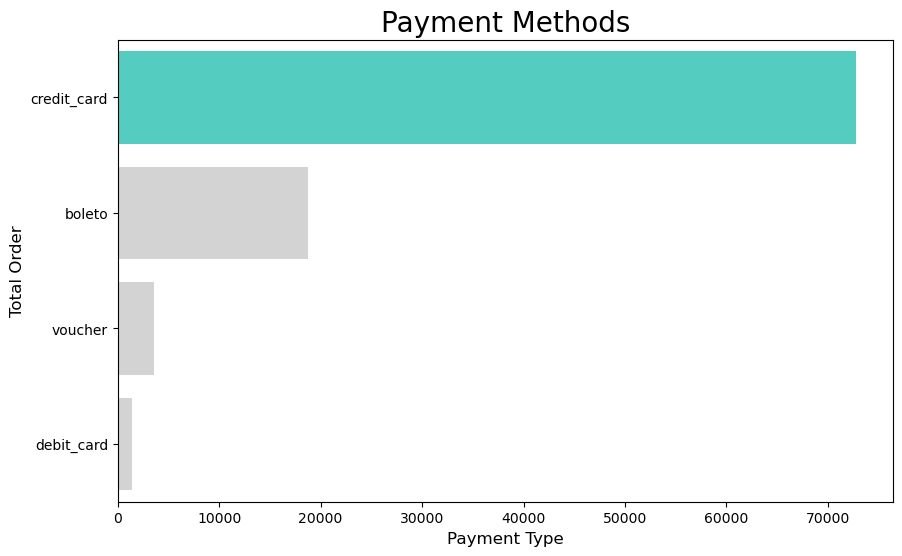

In [89]:
# Get Top often used payment gateway
payment_type_counts = all_df.groupby(by="payment_type").customer_id.nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))

#labels = ['Credit Card', 'Boleto', 'Voucher', 'Debit Card']

# Create a bar plot
ax = sns.barplot(data=payment_type_counts, x="customer_id", y="payment_type",palette=set_custom_palette(payment_type_counts["customer_id"]))

plt.title('Payment Methods', fontsize=20)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Total Order', fontsize=12)

# Display the plot
plt.show()

## Recency, Frequency, and Monetary (RFM) Analisis

Untuk menjawab 3 pertanyaan terakhir maka diperlukan RFM Analysis.

- Recency merupakan parameter yang digunakan untuk melihat terakhir kali pelanggan melakukan transaksi.
- Frequency merupakan parameter yang digunakan untuk melihat seberapa sering pelanggan melakukan transaksi.
- Monetary merupakan seberapa besar revenue yang didapatkan dari pelanggan tersebut.

In [90]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp" : "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "payment_value": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 
#menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = all_df["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,288
1,000161a058600d5901f007fab4c27140,1,67.41,409
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,547
3,0002414f95344307404f0ace7a26f1d5,1,179.35,378
4,000379cdec625522490c315e70c7a9fb,1,107.01,149


## Pertanyaan 5 : Kapan pelanggan ini melakukan transaksi?

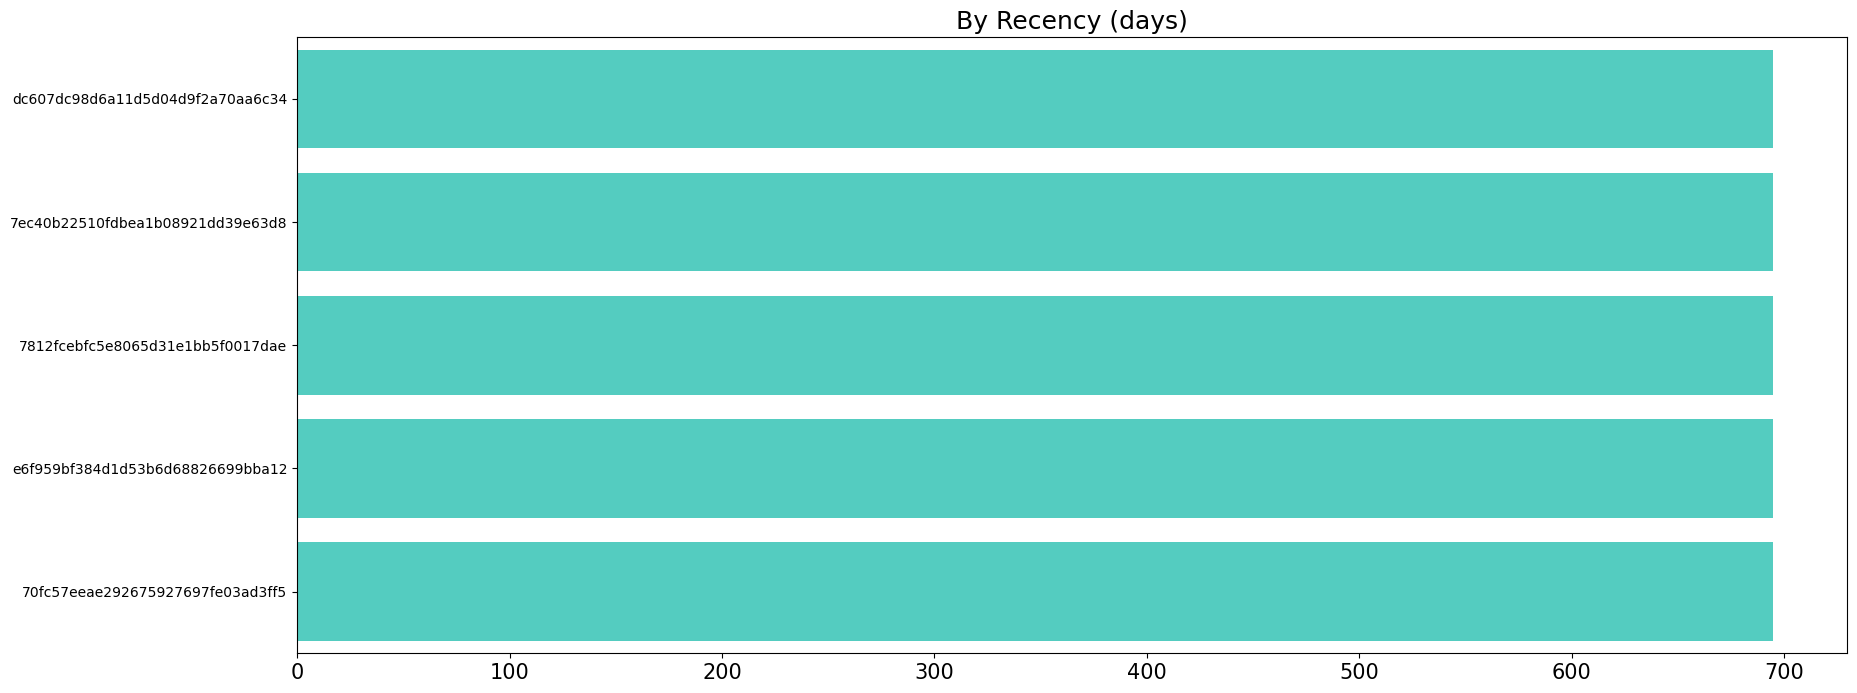

In [91]:
fig, ax = plt.subplots(figsize=(20,8))

sns.barplot(y="customer_id", x="recency", data=rfm_df.sort_values(by="recency", ascending=False).head(5), color="turquoise", ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("By Recency (days)", loc="center", fontsize=18)
ax.tick_params(axis ='x', labelsize=15)

## Pertanyaan 6 : Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?

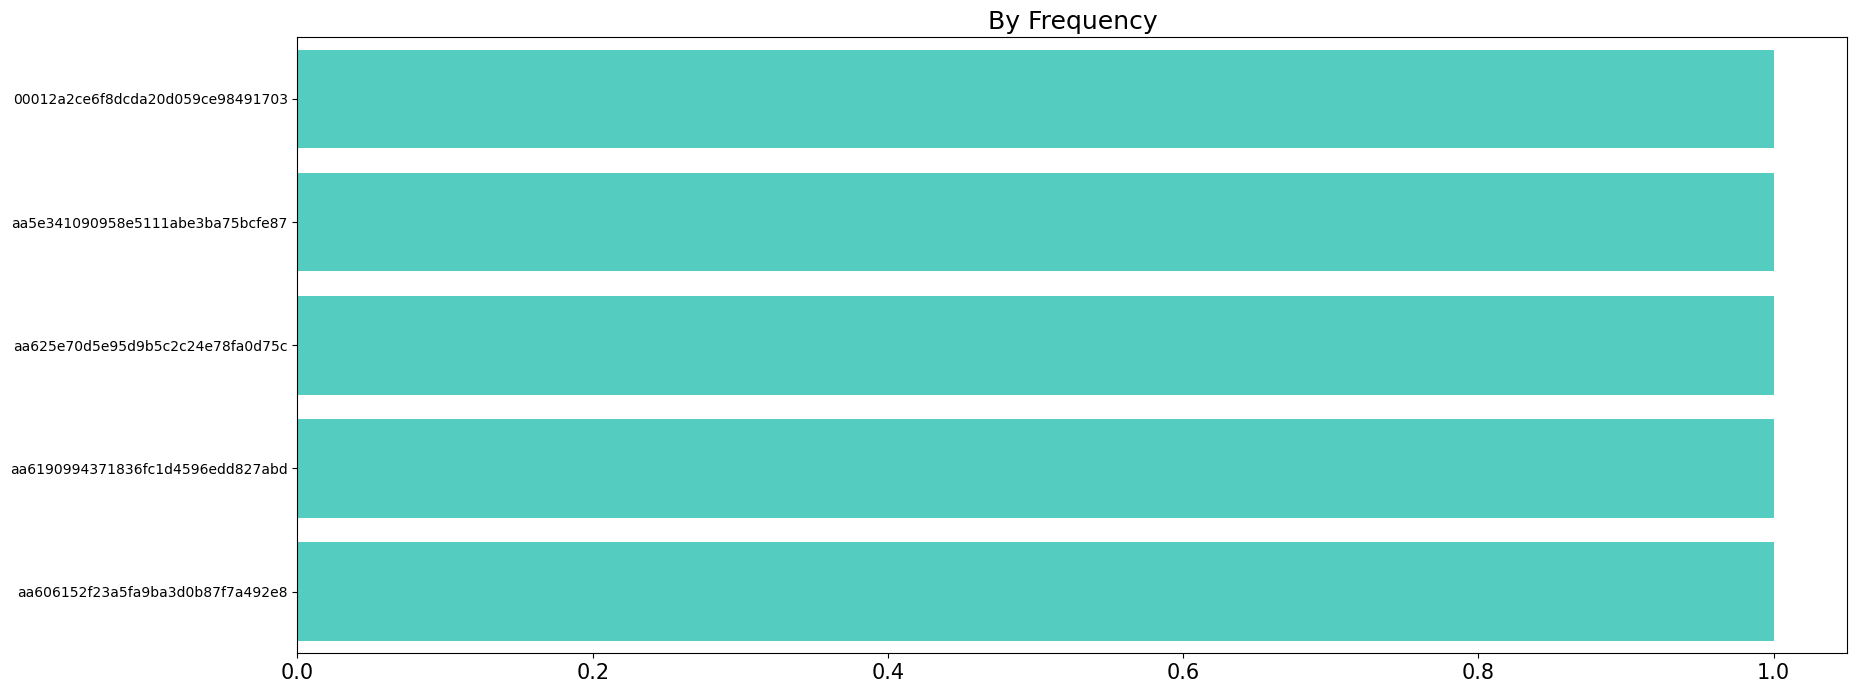

In [92]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(y="customer_id", x="frequency", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), color="turquoise", ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("By Frequency", loc="center", fontsize=18)
ax.tick_params(axis='x', labelsize=15)


## Pertanyaan 7 : Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

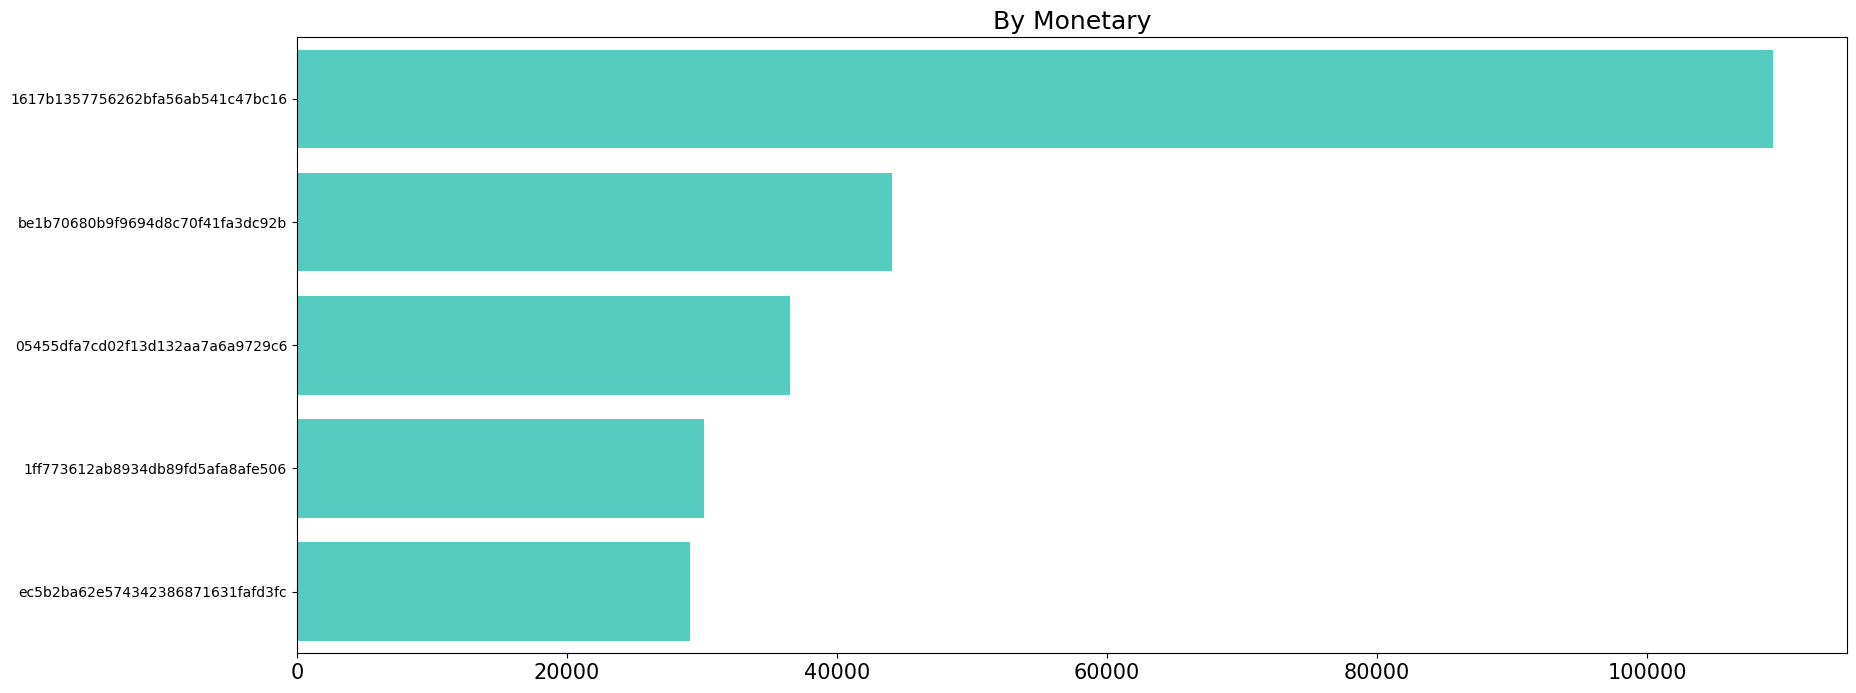

In [93]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(y="customer_id", x="monetary", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), color="turquoise", ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("By Monetary", loc="center", fontsize=18)
ax.tick_params(axis='x', labelsize=15)

# Conclusion

- Conclusion pertanyaan 1 : adalah produk dengan yang dipesan tertinggi adalah bed_bath_tabel.
- Conclusion pertanyaan 2 : puncak total produk yang dipesan terjadi pada bulan november tahun 2017. Kecenderungan pemesanan produk itu naik.
- Conclusion pertanyaan 3 : puncak total revenue terjadi pada bulan november tahun 2017. Kecendurangan revenue juga menaik.
- Conclusion pertanyaan 4 : pelanggan lebih suka membayar dengan credit card sehingga credit card menjadi yang paling terbanyak.
- Conclusion pertanyaan 5 : Kita dapat mengetahui kelima pelanggan tersebut melakukan terakhir kali transaksi
- Conclusion pertanyaan 6 : Kelima pelanggan tersebut melakukan transaksi terbanyak sekitar 700 lebih transaksi.
- Conclusion pertanyaan 7 : Ada satu pelanggan yang paling banyak menghabiskan uangnya untuk transaksi adalah dengan transaksi lebih dari 100000.

In [364]:
all_df.to_csv("semua_data_e-commerce.csv")